In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
clean_data_dir = os.path.join('..','data_files','clean_data')
lake_colors_d = {'Lake Superior':'blue',
                 'Lake Michigan':'red',
                 'Lake Huron':'green',
                 'Lake Erie':'purple',
                 'Lake Ontario':'orange'}

In [3]:
lake_stats = pd.read_csv(os.path.join(clean_data_dir,'lake_stats.csv'),index_col=0)
lakes = lake_stats.index.tolist()
lake_ls = ['Lake '+ x for x in lakes]
lake_ls

['Lake Superior', 'Lake Michigan', 'Lake Huron', 'Lake Erie', 'Lake Ontario']

In [4]:
ice_coverage = pd.read_csv(os.path.join('..','data_files','ice_data','ice_coverage.csv'),index_col='Date')
ice_coverage.head()

,Unnamed: 0,Lake Erie,Lake Huron,Lake Michigan,Lake Ontario,Lake Superior,Weekday
Date,,,,,,,
1972-12-19,0,NaN,NaN,NaN,NaN,0.00,Tuesday
1972-12-20,1,0.0,25.26,9.21,0.61,16.62,Wednesday
1972-12-28,2,0.0,12.65,12.09,2.98,9.35,Thursday
1973-01-02,3,3.4,22.00,6.53,2.80,13.03,Tuesday
1973-01-09,4,25.4,31.30,21.55,21.40,29.69,Tuesday


In [5]:
max_coverage = ice_coverage[lake_ls].max()
max_coverage

Lake Superior    100.00
Lake Michigan     93.33
Lake Huron        98.50
Lake Erie        100.00
Lake Ontario      86.26
dtype: float64

In [6]:
max_yrs = {}
temp = []
max_days = []
for lake in lake_ls:
    max_days = ice_coverage.index[ice_coverage[lake] == max_coverage[lake]].tolist()
    max_yrs[lake] = np.unique([int(x[:4]) for x in max_days]).tolist()
max_yrs

{'Lake Superior': [1996],
 'Lake Michigan': [2014],
 'Lake Huron': [1994],
 'Lake Erie': [1978, 1979, 1996],
 'Lake Ontario': [1979]}

In [7]:
ice_coverage.index[ice_coverage['Lake Erie'] == max_coverage['Lake Erie']].tolist()

['1978-02-08',
 '1978-02-15',
 '1978-02-22',
 '1978-03-01',
 '1978-03-08',
 '1979-02-12',
 '1996-02-05',
 '1996-02-16']

In [8]:
surface_area = lake_stats['Water Area (km2)'].add_prefix('Lake ')
volume = lake_stats['Volumea (km3)'].add_prefix('Lake ')
surface_area

Lake Superior    82100
Lake Michigan    57800
Lake Huron       59600
Lake Erie        25700
Lake Ontario     18960
Name: Water Area (km2), dtype: int64

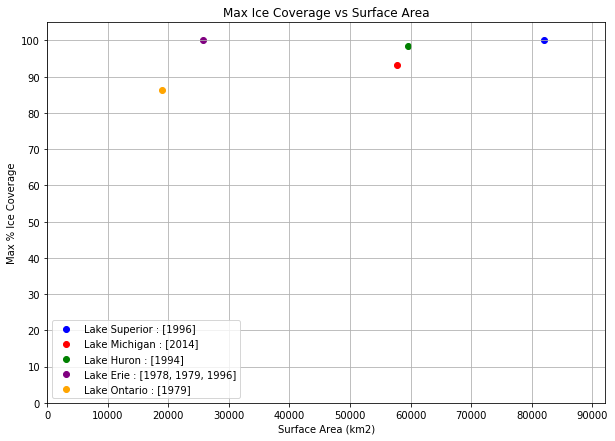

In [9]:
plt.figure(figsize=(10,7))
plt.title('Max Ice Coverage vs Surface Area')
for lake in lake_ls:
    plt.scatter(surface_area[lake],max_coverage[lake],c=lake_colors_d[lake],label=f"{lake} : {max_yrs[lake]}")
plt.xlabel('Surface Area (km2)')
plt.ylabel('Max % Ice Coverage')
plt.xlim(0,max(surface_area.values)+10000)
plt.ylim(0,105)
plt.xticks(np.arange(0,max(surface_area.values)+10000,step=10000))
plt.yticks(np.arange(0,105,step=10))
plt.legend()
plt.grid()
plt.show()